In [1]:
import sys
sys.path.append("C://Users/Admin/Desktop/000-data_science/sem2-project_1/treepedia_dl_public-master")

import model_lib as treepedia_dl
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd

In [94]:
model = tf.keras.models.load_model( "C://Users/Admin/Desktop/000-data_science/sem2-project_1/treepedia_dl_public-master/weights_test.hdf5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense_1 (Dense)             (None, 256)               256256    
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26,090,601
Trainable params: 26,037,481
No

1. predict single GVI values for all images
2. make df consisting of lat, lng, heading, GVI
3. groupby lat, lng, and average out the GVI
4. assign the GVI values to hues in map plot. 

# retrieve image metadata

In [27]:
# write txt file to load test data and test label
lbl_img_paths = []
test_paths = []
i=0 
for root, dirs, files in os.walk('C://Users/Admin/Desktop/000-data_science/sem2-project_1/images/mask/fixed_label'):
    while i < 1: 
        print(root, files)
        i += 1
        for file in files:
            if file.lower().endswith('.jpg') or file.lower().endswith('.jpeg') or file.lower().endswith('.png'):
                # Get the full path of the image file
                file_path = os.path.join(root, file)
                lbl_img_paths.append(file_path)

i=0 
for root, dirs, files in os.walk('C://Users/Admin/Desktop/000-data_science/sem2-project_1/images/mask/test_data'):
    while i < 1: 
        print(root, files)
        i += 1
        for file in files:
            if file.lower().endswith('.jpg') or file.lower().endswith('.jpeg') or file.lower().endswith('.png'):
                # Get the full path of the image file
                file_path = os.path.join(root, file)
                test_paths.append(file_path)

with open('images/mask/jpg_test_data.txt', 'w') as f:
    # Write each file path to a new line in the file
    for lbl_path, test_path in zip(lbl_img_paths, test_paths):
        path = path.replace("\\", "/")
        f.write(f'{test_path}   {lbl_path}\n')

C://Users/Admin/Desktop/000-data_science/sem2-project_1/images/mask/fixed_label ['1.4574946-103.7690224-0.jpg', '1.4574946-103.7690224-120.jpg', '1.4574946-103.7690224-180.jpg', '1.4574946-103.7690224-240.jpg', '1.4574946-103.7690224-300.jpg', '1.4574946-103.7690224-60.jpg', '1.4576324-103.7689637-0.jpg', '1.4576324-103.7689637-120.jpg', '1.4576324-103.7689637-180.jpg', '1.4576324-103.7689637-240.jpg', '1.4576324-103.7689637-300.jpg', '1.4576324-103.7689637-60.jpg', '1.4578067-103.7675917-0.jpg', '1.4578067-103.7675917-120.jpg', '1.4578067-103.7675917-180.jpg', '1.4578067-103.7675917-240.jpg', '1.4578067-103.7675917-300.jpg', '1.4578067-103.7675917-60.jpg', '1.45792-103.769025-300.jpg', '1.4581955-103.7692668-0.jpg', '1.4581955-103.7692668-120.jpg', '1.4581955-103.7692668-180.jpg', '1.4581955-103.7692668-240.jpg', '1.4581955-103.7692668-300.jpg', '1.4581955-103.7692668-60.jpg', '1.4583986-103.7694707-0.jpg', '1.4583986-103.7694707-120.jpg', '1.4583986-103.7694707-180.jpg', '1.4583986-1

In [11]:
import os 

paths = []
i=0 
for root, dirs, files in os.walk('C://Users/Admin/Desktop/000-data_science/sem2-project_1/images/mask/test_data'):
    while i < 1: 
        print(root, files)
        i += 1
        for file in files:
            if file.lower().endswith('.jpg') or file.lower().endswith('.jpeg') or file.lower().endswith('.png'):
                # Get the full path of the image file
                file_path = os.path.join(root, file)
                paths.append(file_path)

paths[0]

C://Users/Admin/Desktop/000-data_science/sem2-project_1/images/mask/test_data ['1.4574946-103.7690224-0.jpg', '1.4574946-103.7690224-120.jpg', '1.4574946-103.7690224-180.jpg', '1.4574946-103.7690224-240.jpg', '1.4574946-103.7690224-300.jpg', '1.4574946-103.7690224-60.jpg', '1.4576324-103.7689637-0.jpg', '1.4576324-103.7689637-120.jpg', '1.4576324-103.7689637-180.jpg', '1.4576324-103.7689637-240.jpg', '1.4576324-103.7689637-300.jpg', '1.4576324-103.7689637-60.jpg', '1.4578067-103.7675917-0.jpg', '1.4578067-103.7675917-120.jpg', '1.4578067-103.7675917-180.jpg', '1.4578067-103.7675917-240.jpg', '1.4578067-103.7675917-300.jpg', '1.4578067-103.7675917-60.jpg', '1.45792-103.769025-300.jpg', '1.4581955-103.7692668-0.jpg', '1.4581955-103.7692668-120.jpg', '1.4581955-103.7692668-180.jpg', '1.4581955-103.7692668-240.jpg', '1.4581955-103.7692668-300.jpg', '1.4581955-103.7692668-60.jpg', '1.4583986-103.7694707-0.jpg', '1.4583986-103.7694707-120.jpg', '1.4583986-103.7694707-180.jpg', '1.4583986-103

'C://Users/Admin/Desktop/000-data_science/sem2-project_1/images/mask/test_data\\1.4574946-103.7690224-0.jpg'

In [18]:
paths = []
i=0 
for root, dirs, files in os.walk('C://Users/Admin/Desktop/000-data_science/sem2-project_1/images/mask/fixed_images'):
    while i < 1: 
        print(root, files)
        i += 1
        for file in files:
            if file.lower().endswith('.jpg') or file.lower().endswith('.jpeg') or file.lower().endswith('.png'):
                # Get the full path of the image file
                file_path = os.path.join(root, file)
                paths.append(file_path)

with open('images/mask/fixed_images/jpg_test_data.txt', 'w') as f:
    # Write each file path to a new line in the file
    for path in paths:
        path = path.replace("\\", "/")
        f.write(f'{path}\n')

C://Users/Admin/Desktop/000-data_science/sem2-project_1/images/mask/fixed_images ['fixed_0.jpg', 'fixed_1.jpg', 'fixed_10.jpg', 'fixed_11.jpg', 'fixed_12.jpg', 'fixed_13.jpg', 'fixed_14.jpg', 'fixed_15.jpg', 'fixed_16.jpg', 'fixed_17.jpg', 'fixed_18.jpg', 'fixed_19.jpg', 'fixed_2.jpg', 'fixed_20.jpg', 'fixed_21.jpg', 'fixed_22.jpg', 'fixed_23.jpg', 'fixed_24.jpg', 'fixed_25.jpg', 'fixed_26.jpg', 'fixed_27.jpg', 'fixed_28.jpg', 'fixed_29.jpg', 'fixed_3.jpg', 'fixed_30.jpg', 'fixed_31.jpg', 'fixed_32.jpg', 'fixed_33.jpg', 'fixed_34.jpg', 'fixed_35.jpg', 'fixed_36.jpg', 'fixed_37.jpg', 'fixed_38.jpg', 'fixed_39.jpg', 'fixed_4.jpg', 'fixed_40.jpg', 'fixed_41.jpg', 'fixed_42.jpg', 'fixed_43.jpg', 'fixed_44.jpg', 'fixed_5.jpg', 'fixed_6.jpg', 'fixed_7.jpg', 'fixed_8.jpg', 'fixed_9.jpg']


In [26]:
test_dir = 'C://Users/Admin/Desktop/000-data_science/sem2-project_1/images/mask/test_data'
for file_name in os.listdir(test_dir):
    print(file_name)

1.4574946-103.7690224-0.jpg
1.4574946-103.7690224-120.jpg
1.4574946-103.7690224-180.jpg
1.4574946-103.7690224-240.jpg
1.4574946-103.7690224-300.jpg
1.4574946-103.7690224-60.jpg
1.4576324-103.7689637-0.jpg
1.4576324-103.7689637-120.jpg
1.4576324-103.7689637-180.jpg
1.4576324-103.7689637-240.jpg
1.4576324-103.7689637-300.jpg
1.4576324-103.7689637-60.jpg
1.4578067-103.7675917-0.jpg
1.4578067-103.7675917-120.jpg
1.4578067-103.7675917-180.jpg
1.4578067-103.7675917-240.jpg
1.4578067-103.7675917-300.jpg
1.4578067-103.7675917-60.jpg
1.45792-103.769025-300.jpg
1.4581955-103.7692668-0.jpg
1.4581955-103.7692668-120.jpg
1.4581955-103.7692668-180.jpg
1.4581955-103.7692668-240.jpg
1.4581955-103.7692668-300.jpg
1.4581955-103.7692668-60.jpg
1.4583986-103.7694707-0.jpg
1.4583986-103.7694707-120.jpg
1.4583986-103.7694707-180.jpg
1.4583986-103.7694707-240.jpg
1.4583986-103.7694707-300.jpg
1.4583986-103.7694707-60.jpg
1.4586617-103.7687351-0.jpg
1.4586617-103.7687351-120.jpg
1.4586617-103.7687351-60.jpg
1

In [12]:
test_dir = 'C://Users/Admin/Desktop/000-data_science/sem2-project_1/images/mask/test_data'

test_data = []
for file_name in os.listdir(test_dir):
    if file_name.endswith('.jpg'):
         # Split the file name into its components using the '-' separator
        file_components = file_name.split('-')
        # Extract the latitude, longitude, and heading information from the file name
        lat = (file_components[0])
        lng = (file_components[1])
        heading = int(file_components[2].split('.')[0])
        # Add the information to the dataframe as a new row
        test_data.append([lat, lng, heading])

test_data = pd.DataFrame(test_data, columns=['lat', 'lng', 'heading'])
test_data.to_csv("test_set_metadata.csv", index=False)
    

In [30]:
true_GVI = np.load('true_GVI_test.npy')

In [37]:
test_df = pd.concat([test_data, pd.DataFrame(true_GVI)], axis=1)
test_df = test_df.rename(columns={0: 'true_GVI'})
test_df.to_csv("test_data_df.csv", index=False)

In [82]:
paths = []
i=0 
for root, dirs, files in os.walk('C://Users/Admin/Desktop/000-data_science/sem2-project_1/images'):
    while i < 1: 
        print(root, files)
        i += 1
        for file in files:
            if file.lower().endswith('.jpg') or file.lower().endswith('.jpeg') or file.lower().endswith('.png'):
                # Get the full path of the image file
                file_path = os.path.join(root, file)
                paths.append(file_path)

len(paths)

C://Users/Admin/Desktop/000-data_science/sem2-project_1/images ['1.455238538601311-103.7626485082271-0.jpg', '1.455238538601311-103.7626485082271-120.jpg', '1.455238538601311-103.7626485082271-180.jpg', '1.455238538601311-103.7626485082271-240.jpg', '1.455238538601311-103.7626485082271-300.jpg', '1.455238538601311-103.7626485082271-60.jpg', '1.455262715339773-103.7614477789313-0.jpg', '1.455262715339773-103.7614477789313-120.jpg', '1.455262715339773-103.7614477789313-180.jpg', '1.455262715339773-103.7614477789313-240.jpg', '1.455262715339773-103.7614477789313-300.jpg', '1.455262715339773-103.7614477789313-60.jpg', '1.455309238599606-103.7616244132992-0.jpg', '1.455309238599606-103.7616244132992-120.jpg', '1.455309238599606-103.7616244132992-180.jpg', '1.455309238599606-103.7616244132992-240.jpg', '1.455309238599606-103.7616244132992-300.jpg', '1.455309238599606-103.7616244132992-60.jpg', '1.455403563873493-103.7632712438025-0.jpg', '1.455403563873493-103.7632712438025-120.jpg', '1.4554

6018

In [90]:
with open('images/img_paths2.txt', 'w') as f:
    # Write each file path to a new line in the file
    for path in paths:
        path = path.replace("\\", "/")
        f.write(f'{path}\n')

In [ ]:
import os

image_dir = 'images'

# Create an empty dataframe to store the extracted information
df = []

for file_name in os.listdir(path):
    if file_name.endswith('.jpg'):
         # Split the file name into its components using the '-' separator
        file_components = file_name.split('-')
        # Extract the latitude, longitude, and heading information from the file name
        lat = (file_components[0])
        lng = (file_components[1])
        heading = int(file_components[2].split('.')[0])
        # Add the information to the dataframe as a new row
        df.append([lat, lng, heading])

img_df = pd.DataFrame(df, columns=['lat', 'lng', 'heading'])
img_df.dtypes
img_df.to_csv('img_metadata.csv', index=False)

In [ ]:
dtypes = {'lat': 'str', 'lng':'str'}
img_metadata = pd.read_csv('img_metadata.csv', dtype=dtypes)
# img_metadata.lat = img_metadata.lat.astype(float)      # lat, lng if converted to float will have smaller sf
img_metadata

,lat,lng,heading
0,1.455238538601311,103.7626485082271,0
1,1.455238538601311,103.7626485082271,120
2,1.455238538601311,103.7626485082271,180
3,1.455238538601311,103.7626485082271,240
4,1.455238538601311,103.7626485082271,300
...,...,...,...
6013,1.472754438426505,103.763838550999,120
6014,1.472754438426505,103.763838550999,180
6015,1.472754438426505,103.763838550999,240
6016,1.472754438426505,103.763838550999,300


In [4]:
# open images paths
image_dir = "C://Users/Admin/Desktop/000-data_science/sem2-project_1/images/img_paths.txt"
with open(image_dir, 'r') as training:
        content = training.readlines()
        img_paths = []

        for lines in content: 
                lines = lines.replace('\n', '')
                img_paths.append(lines)

In [5]:
len(img_paths)
len(set(img_paths))

6019

In [6]:
info = []
for lines in img_paths:
    lines = lines.replace("C://Users/Admin/Desktop/000-data_science/sem2-project_1/images/", "")
    lines = lines.replace(".jpg", "")
    lines = lines.split("-")
    info.append([float(i) for i in lines])

In [64]:
dtypes = {'lat': 'str', 'lng':'str'}
img_metadata = pd.read_csv('img_metadata.csv', dtype=dtypes)
# img_metadata.lat = img_metadata.lat.astype(float)      # lat, lng if converted to float will have smaller sf
img_metadata

,lat,lng,heading
0,1.455238538601311,103.7626485082271,0
1,1.455238538601311,103.7626485082271,120
2,1.455238538601311,103.7626485082271,180
3,1.455238538601311,103.7626485082271,240
4,1.455238538601311,103.7626485082271,300
...,...,...,...
6013,1.472754438426505,103.763838550999,120
6014,1.472754438426505,103.763838550999,180
6015,1.472754438426505,103.763838550999,240
6016,1.472754438426505,103.763838550999,300


# load images

In [14]:
def load_and_resize(image_loc):
    '''
    load street view images as array
    '''
    current_model = [224, 224, 3]
    test_data = []
    test_gt = []
    with open(image_loc, 'r') as training:
        content = training.readlines()
    for line in content:
        line = line.replace('\n', '')
        test_data.append(line)
    imgdata = []
    for path1 in test_data:
        imgdata.append((Image.open(path1)).resize(current_model[0:2]))
    imgdata_array = np.zeros(
        [len(imgdata), current_model[0], current_model[1], current_model[2]])
    for i in range(len(imgdata)):
        imgdata_array[i, :, :, :] = imgdata[i]
    del (imgdata)
    return (imgdata_array)

In [17]:
paths[0]

'C://Users/Admin/Desktop/000-data_science/sem2-project_1/images/mask/test_data\\1.4574946-103.7690224-0.jpg'

In [19]:
test_data_dir = "images/mask/fixed_images/jpg_test_data.txt"
test_label = load_and_resize(test_data_dir)

ValueError: could not broadcast input array from shape (224,224) into shape (224,224,3)

In [96]:
image_dir = "images/img_paths2.txt"
images = load_and_resize(image_dir)

In [97]:
images.shape

(6018, 224, 224, 3)

In [100]:
np.save('all_images_array.npy', images)

# predict GVI with DCNN base model

In [101]:
images = np.load('all_images_array.npy')
images.shape

(6018, 224, 224, 3)

In [104]:
GVI_pred = treepedia_dl.eval_batch(model, images, batch_size=500, verbosity=0)

In [105]:
# concat GVI prediction with each image metadata
df = pd.concat([img_metadata, pd.DataFrame(GVI_pred)], axis=1)
df = df.rename(columns = {0: 'DCNN_base_GVI_pred'})
df

,lat,lng,heading,DCNN_base_GVI_pred
0,1.455238538601311,103.7626485082271,0,0.266811
1,1.455238538601311,103.7626485082271,120,0.080297
2,1.455238538601311,103.7626485082271,180,0.059261
3,1.455238538601311,103.7626485082271,240,0.056515
4,1.455238538601311,103.7626485082271,300,0.190857
...,...,...,...,...
6013,1.472754438426505,103.763838550999,120,0.103171
6014,1.472754438426505,103.763838550999,180,0.091230
6015,1.472754438426505,103.763838550999,240,0.075049
6016,1.472754438426505,103.763838550999,300,0.105612


In [107]:
df.to_csv("DCNN_pretrained_df.csv", index=False)

In [108]:
df_grouped = df.groupby(['lat','lng'])[['DCNN_base_GVI_pred']].mean().reset_index(drop=False)
df_grouped

,lat,lng,DCNN_base_GVI_pred
0,1.455238538601311,103.7626485082271,0.135100
1,1.455262715339773,103.7614477789313,0.399540
2,1.455309238599606,103.7616244132992,0.311569
3,1.455403563873493,103.7632712438025,0.280874
4,1.455428046144688,103.7633592969363,0.226749
...,...,...,...
999,1.472533700093861,103.7643465391866,0.130027
1000,1.472614579060312,103.7632490537146,0.372801
1001,1.472662343862685,103.762351463314,0.107179
1002,1.472680850612937,103.7640053753103,0.134275


In [109]:
# df_grouped.to_csv("DCNN_pretrained_grouped_df.csv", index=False)

# predict GVI with unsupervised classification

1. extract bands out from the RGB images.
2. Green band - red and green - blue
3. if both positive (filter negative values and make them 0)
4. multiply both diff
5. set threshold and let through those larger than it only. 
6. compute GVI

In [110]:
#Extract bands out of RGB images
red = images[:, :, :, 0]
green = images[:, :, :, 1]
blue = images[:, :, :, 2]

print(red.shape, green.shape, blue.shape)

(6018, 224, 224) (6018, 224, 224) (6018, 224, 224)


In [111]:
# compute differences between different red and blue with green band
diff_1 = green - red
diff_2 = green - blue

In [112]:
# difference smaller than 0 implies that the pixel is more blue or red than green
# these pixels are labeled as 0 as it is categorised as not green
diff_1[diff_1 < 0] = 0
diff_2[diff_2 < 0] = 0

In [113]:
# magnify the green 
Diff = diff_1 * diff_2
Diff.shape

(6018, 224, 224)

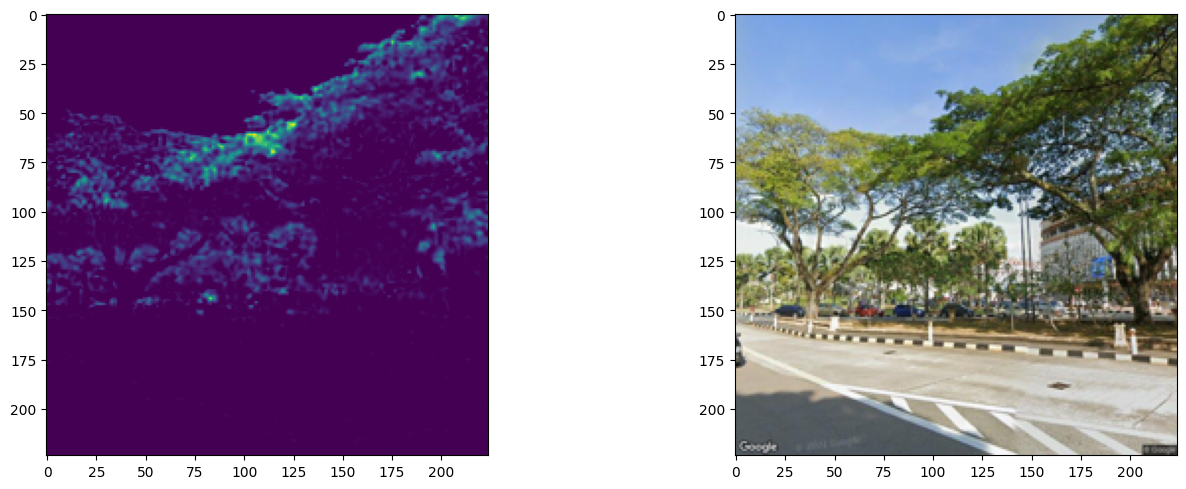

In [115]:
# visualise segmented image vs original image
f, ax = plt.subplots(1,2, figsize = (15,5))

ax[0].imshow(Diff[10])
ax[1].imshow(images[10].astype(int))

plt.tight_layout()

In [116]:
# compute GVI based of unsupervised segmentation
unsupervised_GVI_pred =[]

for i in range(len(Diff)):
    pred = (np.sum(Diff[i] != 0) ) / (224*224)
    unsupervised_GVI_pred.append(pred)

In [117]:
# convert the list to array
unsupervised_GVI_pred = np.array(unsupervised_GVI_pred)

In [118]:
# assign unsupervised GVI prediction to each street view image
unsupervised_df = pd.concat([img_metadata, pd.DataFrame(unsupervised_GVI_pred)], axis=1)
unsupervised_df = unsupervised_df.rename(columns = {0: 'unsupervised_GVI_pred'})
unsupervised_df

,lat,lng,heading,unsupervised_GVI_pred
0,1.455238538601311,103.7626485082271,0,0.449298
1,1.455238538601311,103.7626485082271,120,0.132812
2,1.455238538601311,103.7626485082271,180,0.022142
3,1.455238538601311,103.7626485082271,240,0.066665
4,1.455238538601311,103.7626485082271,300,0.328145
...,...,...,...,...
6013,1.472754438426505,103.763838550999,120,0.114238
6014,1.472754438426505,103.763838550999,180,0.040458
6015,1.472754438426505,103.763838550999,240,0.024095
6016,1.472754438426505,103.763838550999,300,0.129504


In [119]:
#unsupervised_df.to_csv("unsupervised_fixed_df.csv", index=False)

In [120]:
unsupervised_df_grouped = unsupervised_df.groupby(['lat','lng'])[['unsupervised_GVI_pred']].mean().reset_index(drop=False)
unsupervised_df_grouped

,lat,lng,unsupervised_GVI_pred
0,1.455238538601311,103.7626485082271,0.200909
1,1.455262715339773,103.7614477789313,0.468092
2,1.455309238599606,103.7616244132992,0.430176
3,1.455403563873493,103.7632712438025,0.321674
4,1.455428046144688,103.7633592969363,0.265774
...,...,...,...
999,1.472533700093861,103.7643465391866,0.178658
1000,1.472614579060312,103.7632490537146,0.563447
1001,1.472662343862685,103.762351463314,0.214173
1002,1.472680850612937,103.7640053753103,0.175429


In [122]:
#unsupervised_df_grouped.to_csv('unsupervised_grouped_df.csv', index=False)

# map plot GVI

In [124]:
import pandas as pd
unsupervised_df = pd.read_csv('unsupervised_fixed_df.csv')
unsupervised_df

,lat,lng,heading,unsupervised_GVI_pred
0,1.455239,103.762649,0,0.449298
1,1.455239,103.762649,120,0.132812
2,1.455239,103.762649,180,0.022142
3,1.455239,103.762649,240,0.066665
4,1.455239,103.762649,300,0.328145
...,...,...,...,...
6013,1.472754,103.763839,120,0.114238
6014,1.472754,103.763839,180,0.040458
6015,1.472754,103.763839,240,0.024095
6016,1.472754,103.763839,300,0.129504


In [3]:
unsupervised_df_grouped = unsupervised_df.groupby(['lat','lng'])[['unsupervised_GVI_pred']].mean().reset_index(drop=False)
unsupervised_df_grouped

,lat,lng,unsupervised_GVI_pred
0,1.455239,103.762649,0.200700
1,1.455263,103.761448,0.464641
2,1.455309,103.761624,0.427631
3,1.455404,103.763271,0.319980
4,1.455428,103.763359,0.264602
...,...,...,...
999,1.472534,103.764347,0.178385
1000,1.472615,103.763249,0.561660
1001,1.472662,103.762351,0.213648
1002,1.472681,103.764005,0.176243


In [27]:
# GVI with unsupervised segmentation plotted on map
import plotly.express as px
import pandas as pd

# df = pd.concat([sv_unrecorded, sv_df, sv_df2, sv_df4], axis=0)
green_scale = [[0, 'rgb(100,0,0)'], [1, 'rgb(0,191,0)']]
fig = px.scatter_mapbox(unsupervised_df_grouped, 
                        lat="lat", 
                        lon="lng", 
                        color = 'unsupervised_GVI_pred',
                        color_continuous_scale= green_scale, #'Viridis',
                        # size="Listed",
                        mapbox_style = "carto-positron",
                        zoom=8, 
                        height=800,
                        width=800)

# fig.update_layout(mapbox_style="light")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Clustering GVI and point data

In [2]:
from sklearn.cluster import AgglomerativeClustering
unsupervised_df_grouped = pd.read_csv('unsupervised_grouped_df.csv')
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(unsupervised_df_grouped)

AgglomerativeClustering(n_clusters=4)

In [3]:
clustered_df = pd.concat([unsupervised_df_grouped, pd.DataFrame(agg_clustering.labels_)], axis=1)
clustered_df.rename(columns= {0: 'cluster'}, inplace=True)

In [4]:
#clustered_df.to_csv('unsupervised_clustered.csv')

In [8]:
unsupervised_df = pd.read_csv('unsupervised_fixed_df.csv')
merged_df = pd.merge(unsupervised_df, clustered_df[['lat', 'lng', 'cluster']], on=['lat', 'lng'], how='inner')
merged_df.cluster.unique()

merged_df.to_csv('unsupervised_df_merged.csv', index=False)

In [66]:
import os

image_dir = 'images'

# Create an empty dataframe to store the extracted information
df = []

for file_name in os.listdir(path):
    if file_name.endswith('.jpg'):
         # Split the file name into its components using the '-' separator
        file_components = file_name.split('-')
        # Extract the latitude, longitude, and heading information from the file name
        lat = (file_components[0])
        lng = (file_components[1])
        heading = int(file_components[2].split('.')[0])
        # Add the information to the dataframe as a new row
        df.append([lat, lng, heading])

img_df = pd.DataFrame(df, columns=['lat', 'lng', 'heading'])
img_df.dtypes
img_df.to_csv('img_metadata.csv', index=False)

In [20]:
x = clustered_df[['lat','lng']].isin(unsupervised_df[['lat','lng']])
x

,lat,lng
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
999,False,False
1000,False,False
1001,False,False
1002,False,False


In [14]:
clustered_df[clustered_df.lat == 1.45625823073316]
#clustered_df.cluster.isnull().sum()

,lat,lng,unsupervised_GVI_pred,cluster
24,1.456258,103.760531,0.23675,1


In [30]:
# df = pd.concat([sv_unrecorded, sv_df, sv_df2, sv_df4], axis=0)
green_scale = [[0, 'rgb(100,0,0)'], [1, 'rgb(0,191,0)']]
fig = px.scatter_mapbox(clustered_df, 
                        lat="lat", 
                        lon="lng", 
                        color = 'cluster',
                        color_continuous_scale = 'Viridis',
                        # size="Listed",
                        mapbox_style = "carto-positron",
                        zoom=8, 
                        height=800,
                        width=800)

# fig.update_layout(mapbox_style="light")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [31]:
x = clustered_df[clustered_df['cluster'] == 3]
x.loc[50:1000, :]

,lat,lng,unsupervised_GVI_pred,cluster
53,1.457398,103.765993,0.127860,3
65,1.457705,103.764051,0.080467,3
68,1.457737,103.766006,0.115327,3
70,1.457807,103.767592,0.034582,3
72,1.457833,103.761481,0.000060,3
...,...,...,...,...
972,1.471541,103.765650,0.152932,3
976,1.471742,103.765749,0.158273,3
979,1.471825,103.765585,0.152364,3
982,1.471962,103.765683,0.152364,3
